In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import json
import seaborn as sn

In [2]:
#read csv of iso codes

file= './Resources/iso_code.csv'

iso_code_df = pd.read_csv(file)

iso_code_df

,iso_code,total_vaccinations,people_fully_vaccinated_per_hundred
0,ABW,73360.0,18.84
1,AIA,6898.0,5.22
2,ALB,400064.0,0.02
3,AND,26414.0,6.06
4,ARE,10336214.0,38.79
...,...,...,...
116,TUR,21678461.0,9.84
117,URY,1695351.0,15.95
118,USA,232407669.0,28.93
119,ZAF,292623.0,0.49


In [3]:
#adding empty columns to df

#GDP Column
iso_code_df['GDP'] = ''
iso_code_df['Total_Pop'] = ''
iso_code_df['Pop_Den'] = ''
iso_code_df['SchoolCompletion'] = ''
iso_code_df

,iso_code,total_vaccinations,people_fully_vaccinated_per_hundred,GDP,Total_Pop,Pop_Den,SchoolCompletion
0,ABW,73360.0,18.84,,,,
1,AIA,6898.0,5.22,,,,
2,ALB,400064.0,0.02,,,,
3,AND,26414.0,6.06,,,,
4,ARE,10336214.0,38.79,,,,
...,...,...,...,...,...,...,...
116,TUR,21678461.0,9.84,,,,
117,URY,1695351.0,15.95,,,,
118,USA,232407669.0,28.93,,,,
119,ZAF,292623.0,0.49,,,,


In [4]:
gdp_list= []

variable= ['NY.GDP.MKTP.CD','SP.POP.TOTL.','EN.POP.DNST','SE.PRM.CMPT.ZS']
date= '2018'

for j, var in enumerate(variable): 
    for i, iso in enumerate(iso_code_df['iso_code']):
        try:
            base_url = f'http://api.worldbank.org/v2/country/{iso}/indicator/{var}?date={date}&format=json'
            response = requests.get(base_url).json()

            responseJSON = response[1][0]['value']
            
            #add response to dataframe
            iso_code_df.iloc[i,3+j] = responseJSON

        except: 
            print(f'Error {iso},{var} data missing.')


Error AIA,NY.GDP.MKTP.CD data missing.
Error FLK,NY.GDP.MKTP.CD data missing.
Error GGY,NY.GDP.MKTP.CD data missing.
Error JEY,NY.GDP.MKTP.CD data missing.
Error MSR,NY.GDP.MKTP.CD data missing.
Error OWID_CYN,NY.GDP.MKTP.CD data missing.
Error OWID_ENG,NY.GDP.MKTP.CD data missing.
Error OWID_NIR,NY.GDP.MKTP.CD data missing.
Error OWID_SCT,NY.GDP.MKTP.CD data missing.
Error OWID_WLS,NY.GDP.MKTP.CD data missing.
Error SHN,NY.GDP.MKTP.CD data missing.
Error AIA,SP.POP.TOTL. data missing.
Error FLK,SP.POP.TOTL. data missing.
Error GGY,SP.POP.TOTL. data missing.
Error JEY,SP.POP.TOTL. data missing.
Error MSR,SP.POP.TOTL. data missing.
Error OWID_CYN,SP.POP.TOTL. data missing.
Error OWID_ENG,SP.POP.TOTL. data missing.
Error OWID_NIR,SP.POP.TOTL. data missing.
Error OWID_SCT,SP.POP.TOTL. data missing.
Error OWID_WLS,SP.POP.TOTL. data missing.
Error SHN,SP.POP.TOTL. data missing.
Error AIA,EN.POP.DNST data missing.
Error FLK,EN.POP.DNST data missing.
Error GGY,EN.POP.DNST data missing.
Error 

In [6]:
iso_code_df.replace('',np.NaN,inplace=True)
iso_cleaned_df = iso_code_df.dropna()

In [7]:
iso_cleaned_df

,iso_code,total_vaccinations,people_fully_vaccinated_per_hundred,GDP,Total_Pop,Pop_Den,SchoolCompletion
2,ALB,400064.0,0.02,1.514702e+10,2866376.0,104.612263,101.537857
6,AUT,2863389.0,8.73,4.550949e+11,8840521.0,107.131859,99.813004
7,AZE,1440243.0,4.87,4.711294e+10,9939771.0,120.257592,100.219948
10,BGR,750899.0,2.56,6.623016e+10,7025037.0,64.711100,86.618538
11,BHR,1206763.0,31.14,3.765250e+10,1569439.0,2012.101282,97.874123
...,...,...,...,...,...,...,...
114,THA,1227032.0,0.31,5.065141e+11,69428524.0,135.897207,93.420471
116,TUR,21678461.0,9.84,7.783819e+11,82319724.0,106.960129,88.527779
117,URY,1695351.0,15.95,5.959689e+10,3449299.0,19.708028,103.224648
118,USA,232407669.0,28.93,2.058016e+13,326687501.0,35.713622,100.092697


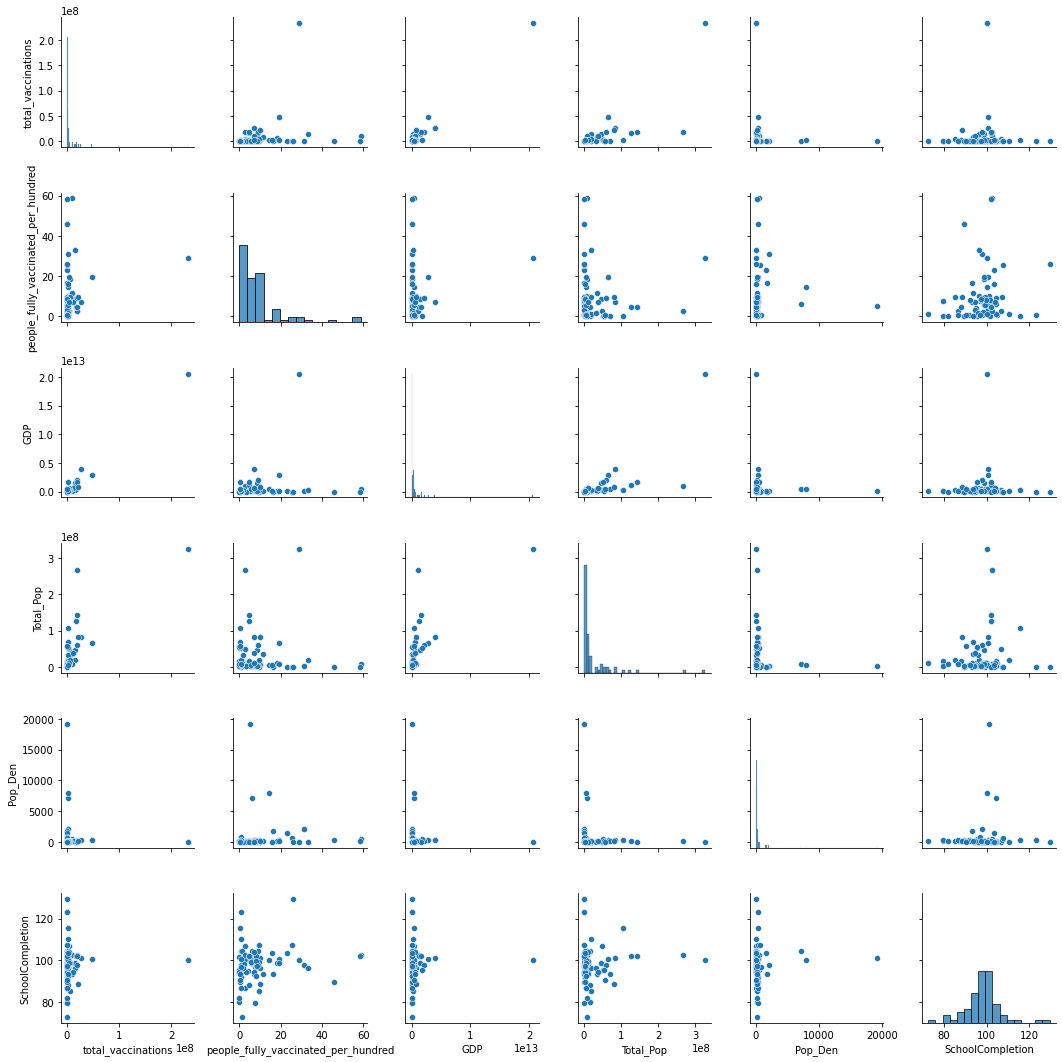

In [8]:
# seaborn pairwise plotting
sn.pairplot(iso_cleaned_df)

In [10]:
iso_cleaned_df[iso_cleaned_df['iso_code'] == 'GIB']

,iso_code,total_vaccinations,people_fully_vaccinated_per_hundred,GDP,Total_Pop,Pop_Den,SchoolCompletion


In [15]:
iso_cleaned_df.sort_values('GDP',ascending=False)

,iso_code,total_vaccinations,people_fully_vaccinated_per_hundred,GDP,Total_Pop,Pop_Den,SchoolCompletion
118,USA,232407669.0,28.93,2.058016e+13,326687501.0,35.713622,100.092697
25,DEU,25892613.0,7.21,3.963768e+12,82905782.0,237.294012,100.843323
37,GBR,47045391.0,19.45,2.860668e+12,66460344.0,274.708982,100.597458
58,ITA,18502829.0,8.98,2.091545e+12,60421760.0,202.941457,97.646721
64,KOR,2735051.0,0.29,1.724846e+12,51606633.0,529.190248,95.376770
...,...,...,...,...,...,...,...
105,SLE,57364.0,0.07,4.085115e+09,7650154.0,105.987171,81.785339
107,SMR,26895.0,25.52,1.655301e+09,33785.0,563.083333,107.419350
112,SYC,123831.0,58.21,1.586009e+09,96762.0,210.352174,101.853119
43,GRD,12764.0,0.88,1.168696e+09,111454.0,327.805882,123.001228
